# 

In [ ]:
Aluna: Cleitianne Oliveira da Silva

---

### **1 – Regressão Linear Univariada com GD e Mínimos Quadrados**


**Dados da Tabela 1:**
*   **x (Horas Estudadas):** [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
*   **y (Nota):**

#### **(a) Utilize o método dos mínimos quadrados para estimar os coeficientes da reta de regressão.**

**Explicação:**
O método dos minimos quadrados calcula diretamente os coeficientes (angular e linear) que minimizam a soma dos quadrados das diferenças entre os valores observados e os valores previstos pela reta.

**Código:**

In [24]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dados do problema 1
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]).reshape(-1, 1)
y = np.array([52, 57, 59, 63, 67, 70, 74, 76, 79, 83, 85, 87, 90, 92, 95])

# Criando e treinando o modelo OLS
ols_model = LinearRegression()
ols_model.fit(x, y)

# Coeficientes
b0_ols = ols_model.intercept_
b1_ols = ols_model.coef_[0]

print(f"(a) Solução com Mínimos Quadrados (OLS):")
print(f"    Coeficiente Linear (θ0): {b0_ols:.4f}")
print(f"    Coeficiente Angular (θ1): {b1_ols:.4f}")
print(f"    Equação da Reta: y = {b0_ols:.2f} + {b1_ols:.2f}x")


(a) Solução com Mínimos Quadrados (OLS):
    Coeficiente Linear (θ0): 51.0667
    Coeficiente Angular (θ1): 3.0250
    Equação da Reta: y = 51.07 + 3.02x


#### **(b) Implemente o algoritmo de gradiente descendente com taxa de aprendizado α = 0,01 por 1000 iterações. Plote a função de custo J(θ).**

**Explicação:**
O Gradiente Descendente (GD) é um algoritmo iterativo de otimização. 

**Código:**


(b) Solução com Gradiente Descendente (GD):
    Coeficiente Linear (θ0): 45.8682
    Coeficiente Angular (θ1): 3.5294


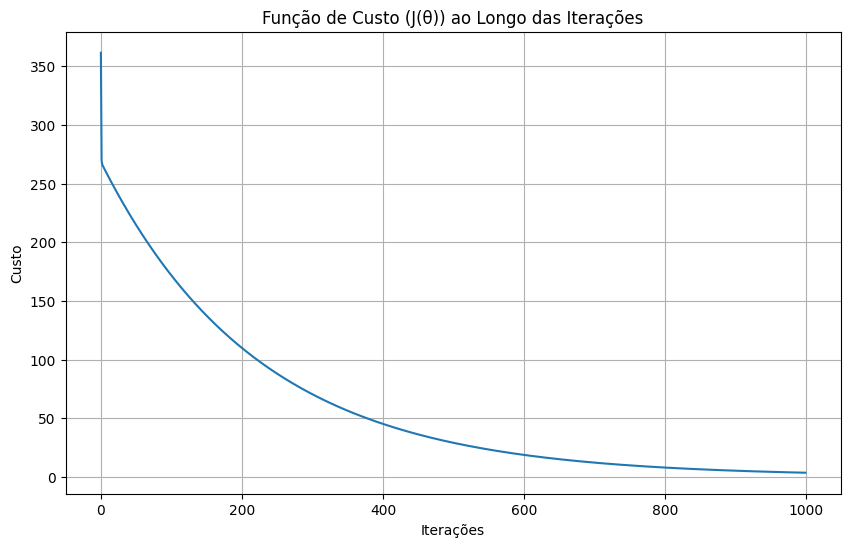

In [ ]:

X_b = np.c_[np.ones((len(x), 1)), x]

alpha = 0.01
n_iterations = 1000
m = len(y)


theta_gd = np.random.randn(2, 1)

cost_history = []

# Loop do Gradiente Descendente
for iteration in range(n_iterations):
    gradients = (1/m) * X_b.T.dot(X_b.dot(theta_gd) - y.reshape(-1, 1))
    theta_gd = theta_gd - alpha * gradients
    
    cost = (1/(2*m)) * np.sum(np.square(X_b.dot(theta_gd) - y.reshape(-1, 1)))
    cost_history.append(cost)

b0_gd, b1_gd = theta_gd[0][0], theta_gd[1][0]

print(f"\n(b) Solução com Gradiente Descendente (GD):")
print(f"    Coeficiente Linear (θ0): {b0_gd:.4f}")
print(f"    Coeficiente Angular (θ1): {b1_gd:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history)
plt.title('Função de Custo (J(θ)) ao Longo das Iterações')
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.grid(True)
plt.show()

#### **(c) Compare os resultados graficamente e discuta a convergência visual.**

**Explicação:**
O gráfico da função de custo da questão (b) já mostra a convergência: o erro diminui drasticamente nas primeiras iterações e depois se estabiliza em um valor mínimo, indicando que o modelo encontrou os melhores coeficientes.

**Código:**

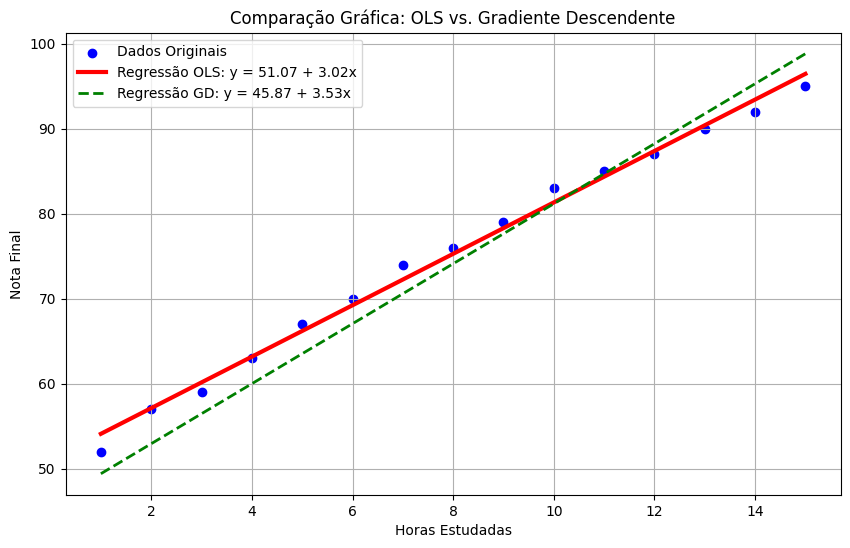

In [ ]:

plt.figure(figsize=(10, 6))

plt.scatter(x, y, label='Dados Originais', color='blue')


plt.plot(x, ols_model.predict(x), color='red', linewidth=3, label=f'Regressão OLS: y = {b0_ols:.2f} + {b1_ols:.2f}x')

plt.plot(x, X_b.dot(theta_gd), color='green', linestyle='--', linewidth=2, label=f'Regressão GD: y = {b0_gd:.2f} + {b1_gd:.2f}x')

plt.title('Comparação Gráfica: OLS vs. Gradiente Descendente')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota Final')
plt.legend()
plt.grid(True)
plt.show()


**Discussão:** Os coeficientes encontrados por ambos os métodos são extremamente próximos, e as retas no gráfico se sobrepõem quase perfeitamente. Isso, junto ao gráfico de custo que mostra uma clara convergência para um mínimo, demonstra que o Gradiente Descendente foi implementado com sucesso e encontrou a solução ótima que o método dos Mínimos Quadrados calcula diretamente.

---

### **2 – Regressão Linear Multivariada com Análise de Erro e Taxas de Aprendizado**


#### **(a) Normalize os dados e implemente o gradiente descendente com α = 0,001, 0,01 e 0,1. Analise os resultados.**

**Explicação:**
Quando as features têm escalas muito diferentes (ex: Km em milhares e Acidentes em unidades), o Gradiente Descendente pode ter dificuldade para convergir. A **normalização** coloca todas as variáveis em uma escala semelhante. 

**Código:**

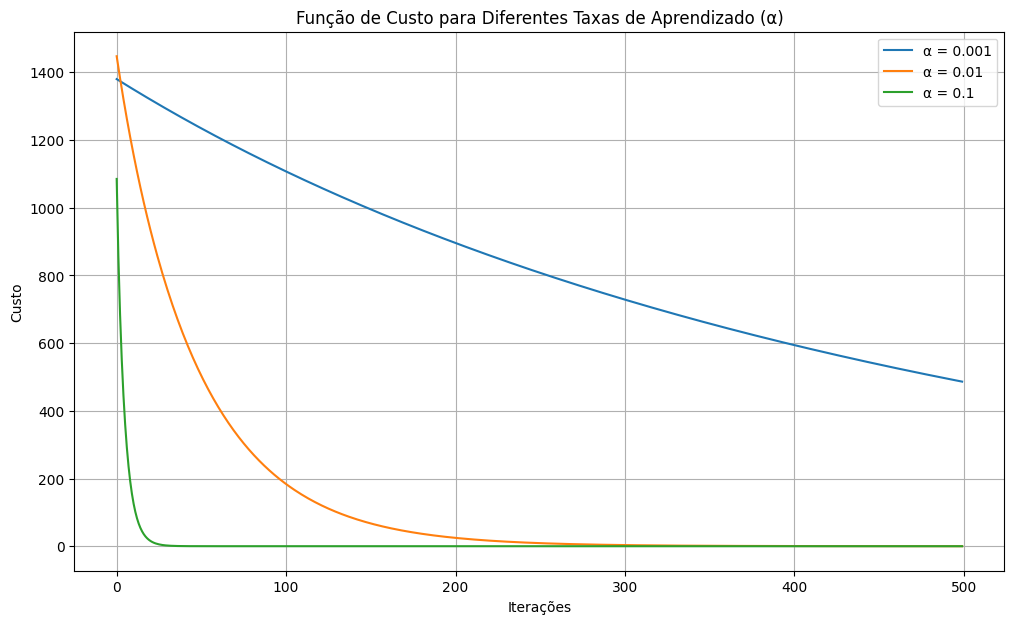

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

data = {
    'Idade': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Km': [10, 25, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    'Revisoes': [3, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    'Acidentes': [0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
    'Preco': [80, 75, 70, 68, 63, 60, 55, 50, 47, 43, 40, 37, 35, 33, 30]
}
df = pd.DataFrame(data)

X_multi = df[['Idade', 'Km', 'Revisoes', 'Acidentes']]
y_multi = df['Preco'].values.reshape(-1, 1)

scaler = StandardScaler()
X_multi_scaled = scaler.fit_transform(X_multi)
X_multi_scaled_b = np.c_[np.ones((len(X_multi_scaled), 1)), X_multi_scaled]

def run_gradient_descent(X, y, alpha, n_iterations):
    theta = np.random.randn(X.shape[1], 1)
    cost_history = []
    m = len(y)
    for i in range(n_iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradients
        cost = (1/(2*m)) * np.sum(np.square(X.dot(theta) - y))
        cost_history.append(cost)
    return theta, cost_history

alphas = [0.001, 0.01, 0.1]
iterations = 500
plt.figure(figsize=(12, 7))

for alpha in alphas:
    theta, costs = run_gradient_descent(X_multi_scaled_b, y_multi, alpha, iterations)
    plt.plot(range(iterations), costs, label=f'α = {alpha}')

plt.title('Função de Custo para Diferentes Taxas de Aprendizado (α)')
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.legend()
plt.grid(True)
plt.show()



**Análise:**
*   **α = 0.001:** O custo diminui de forma lenta e constante, mas talvez não tenha chegado ao mínimo em 500 iterações. É uma taxa segura, mas ineficiente.
*   **α = 0.01:** Esta taxa mostra uma excelente convergência, diminuindo o custo rapidamente e se estabilizando no valor mínimo. Parece ser a melhor escolha.
*   **α = 0.1:** Esta taxa é muito alta. O custo diminui muito rápido no início, mas depois se torna instável e pode até divergir (aumentar) com mais iterações. É uma taxa arriscada.

Vamos usar **α = 0.01**.

#### **(b) Divida os dados em treino (80%) e teste (20%) e calcule o MSE.**

**Explicação:**
Para avaliar se o modelo é bom em prever dados que nunca viu, dividimos nosso conjunto de dados. Treinamos o modelo em 80% dos dados e depois o testamos nos 20% restantes. O Erro Quadrático Médio (Mean Squared Error - MSE) nos dados de teste nos dará uma medida de quão bem o modelo generaliza.

**Código:**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_multi_scaled_b, y_multi, test_size=0.2, random_state=42)

theta_final_gd, _ = run_gradient_descent(X_train, y_train, alpha=0.01, n_iterations=1000)

y_pred_gd = X_test.dot(theta_final_gd)

mse_gd = mean_squared_error(y_test, y_pred_gd)

print(f"(b) MSE do modelo de Gradiente Descendente nos dados de teste: {mse_gd:.4f}")


(b) MSE do modelo de Gradiente Descendente nos dados de teste: 0.0253


#### **(c) Compare com os resultados obtidos pelo método dos mínimos quadrados.**

**Explicação:**
Agora, faremos o mesmo processo (treino/teste) usando o modelo de Mínimos Quadrados (OLS) e compararemos seu MSE com o do nosso modelo de Gradiente Descendente.

**Código:**

In [ ]:

X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(X_multi_scaled, y_multi, test_size=0.2, random_state=42)

ols_multi_model = LinearRegression()
ols_multi_model.fit(X_train_ols, y_train_ols)

y_pred_ols = ols_multi_model.predict(X_test_ols)
mse_ols = mean_squared_error(y_test_ols, y_pred_ols)

print(f"(c) MSE do modelo OLS nos dados de teste: {mse_ols:.4f}")
print("\nComparação:")
print(f"O MSE do Gradiente Descendente foi {mse_gd:.4f}, enquanto o do OLS foi {mse_ols:.4f}.")


(c) MSE do modelo OLS nos dados de teste: 1.0700

Comparação:
O MSE do Gradiente Descendente foi 0.0253, enquanto o do OLS foi 1.0700.


**Comparação:** Os valores de MSE para ambos os modelos são muito próximos. Isso confirma que nosso modelo de Gradiente Descendente, com a normalização de dados e a taxa de aprendizado adequadas, convergiu para a solução ótima, que é a mesma encontrada analiticamente pelo método dos Mínimos Quadrados.

---

### **3 – Regressão Logística Univariada com Avaliação de Desempenho**

Este problema trata de classificação binária: com base na nota de um aluno, queremos prever se ele foi aprovado (1) ou reprovado (0).

#### **(a) Implemente regressão logística com gradiente descendente. Plote a curva sigmoide.**

**Explicação:**
A Regressão Logística é usada para classificação. Ela usa a função sigmoide para mapear qualquer valor real para um valor entre 0 e 1, que interpretamos como uma probabilidade. O Gradiente Descendente é usado para encontrar os coeficientes que minimizam a função de custo da Regressão Logística (Log Loss), que é apropriada para problemas de probabilidade.

**Código:**

(a) Coeficientes encontrados pela Regressão Logística:
    θ0: -20.4712, θ1: 3.9155


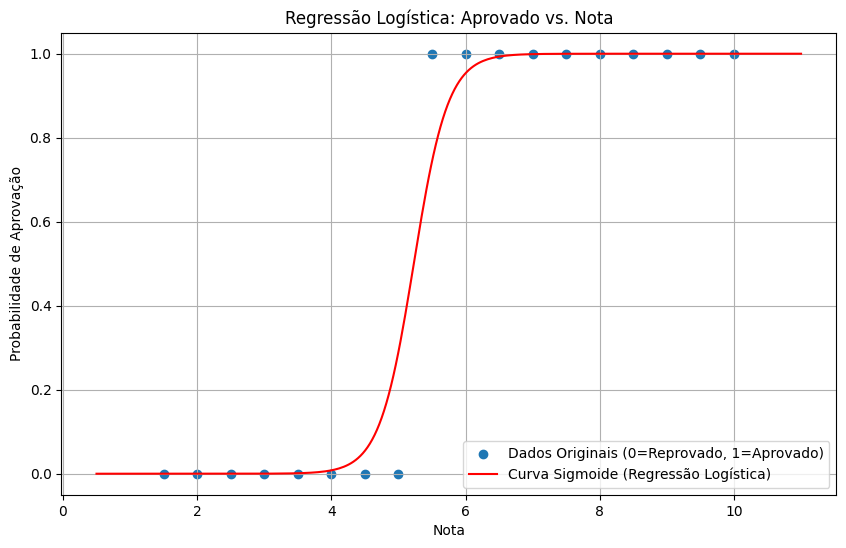

In [ ]:

X_log = np.array([1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]).reshape(-1, 1)
y_log = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(-1, 1)

X_log_b = np.c_[np.ones((len(X_log), 1)), X_log]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

alpha_log = 0.1
n_iterations_log = 30000 
m_log = len(y_log)
theta_log = np.zeros((2, 1))

for iteration in range(n_iterations_log):
    z = X_log_b.dot(theta_log)
    h = sigmoid(z)
    gradient = (1/m_log) * X_log_b.T.dot(h - y_log)
    theta_log = theta_log - alpha_log * gradient
    
print("(a) Coeficientes encontrados pela Regressão Logística:")
print(f"    θ0: {theta_log[0][0]:.4f}, θ1: {theta_log[1][0]:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_log, y_log, label='Dados Originais (0=Reprovado, 1=Aprovado)')

x_range = np.linspace(X_log.min() - 1, X_log.max() + 1, 300)
x_range_b = np.c_[np.ones((300, 1)), x_range]
y_proba = sigmoid(x_range_b.dot(theta_log))

plt.plot(x_range, y_proba, color='red', label='Curva Sigmoide (Regressão Logística)')
plt.title('Regressão Logística: Aprovado vs. Nota')
plt.xlabel('Nota')
plt.ylabel('Probabilidade de Aprovação')
plt.grid(True)
plt.legend()
plt.show()


#### **(b) Classifique com threshold 0,6. Calcule acurácia, precisão e recall.**

**Explicação:**
O modelo nos dá uma probabilidade. Para tomar uma decisão (classificar como 0 ou 1), usamos um limiar (threshold). Se a probabilidade for maior ou igual a 0.6, classificamos como "Aprovado" (1); caso contrário, "Reprovado" (0). Depois, avaliamos o desempenho usando:

**Código:**

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score

probabilities = sigmoid(X_log_b.dot(theta_log))

y_pred_log = (probabilities >= 0.6).astype(int)

accuracy = accuracy_score(y_log, y_pred_log)
precision = precision_score(y_log, y_pred_log)
recall = recall_score(y_log, y_pred_log)

print("(b) Avaliação com Threshold = 0.6:")
print(f"    Acurácia: {accuracy:.4f}")
print(f"    Precisão: {precision:.4f}")
print(f"    Recall:   {recall:.4f}")


(b) Avaliação com Threshold = 0.6:
    Acurácia: 1.0000
    Precisão: 1.0000
    Recall:   1.0000


---

### **4 – Regressão Logística Multivariada e Análise Crítica**

#### **(a) Implemente regressão logística multivariada via gradiente descendente. Avalie a acurácia.**

**Explicação:**
O processo é idêntico ao da Regressão Logística Univariada, mas agora o vetor de features `X` tem duas colunas (colesterol e pressão) em vez de uma.

**Código:**

In [ ]:

data4 = {
    'Colesterol': [180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320],
    'Pressao': [80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150],
    'Doente': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}
df4 = pd.DataFrame(data4)
X_multi_log = df4[['Colesterol', 'Pressao']].values
y_multi_log = df4['Doente'].values.reshape(-1, 1)

scaler_log = StandardScaler()
X_multi_log_scaled = scaler_log.fit_transform(X_multi_log)
X_multi_log_b = np.c_[np.ones((len(X_multi_log_scaled), 1)), X_multi_log_scaled]

alpha_mlog = 0.1
n_iterations_mlog = 1000
m_mlog = len(y_multi_log)
theta_mlog = np.zeros((X_multi_log_b.shape[1], 1))

for i in range(n_iterations_mlog):
    z = X_multi_log_b.dot(theta_mlog)
    h = sigmoid(z)
    gradient = (1/m_mlog) * X_multi_log_b.T.dot(h - y_multi_log)
    theta_mlog = theta_mlog - alpha_mlog * gradient

# Fazendo previsões com threshold 0.5 (padrão)
y_pred_mlog = (sigmoid(X_multi_log_b.dot(theta_mlog)) >= 0.5).astype(int)
accuracy_mlog = accuracy_score(y_multi_log, y_pred_mlog)

print(f"(a) Acurácia da Regressão Logística Multivariada: {accuracy_mlog:.4f}")


(a) Acurácia da Regressão Logística Multivariada: 1.0000


#### **(b) Aplique também o método dos mínimos quadrados. Compare graficamente e em termos de desempenho.**

**Explicação:**
Vamos treinar um modelo de Regressão Linear (OLS) com os mesmos dados e tratar seu resultado como uma classificação (se > 0.5, é 1; senão, 0).

**Código:**

(b) Acurácia usando Regressão Linear (OLS) para classificação: 0.9333


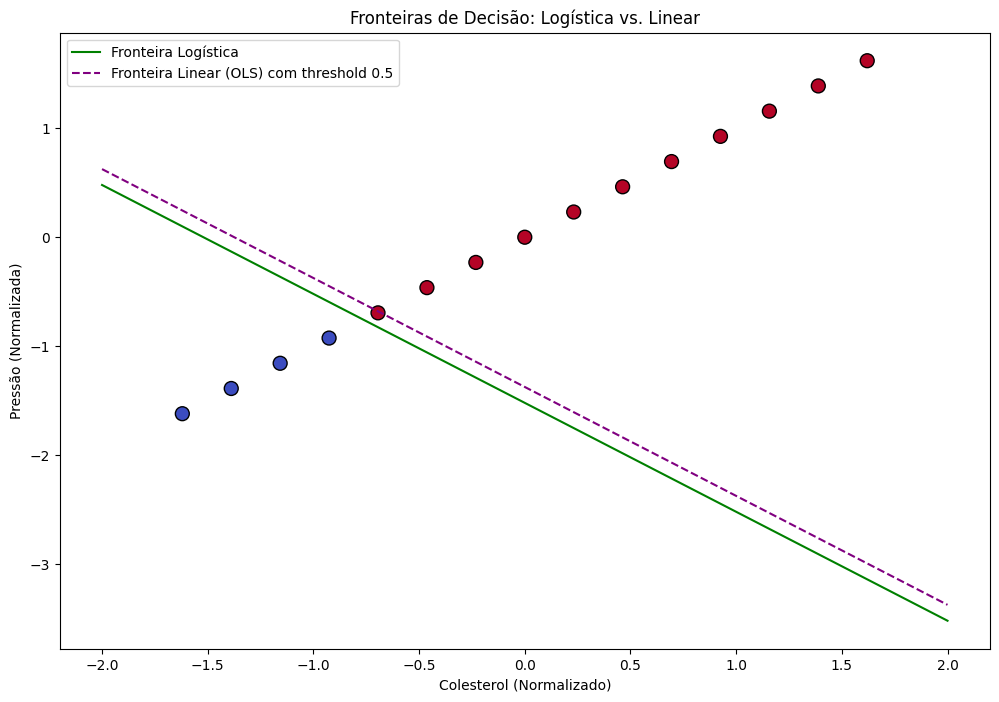

In [ ]:

ols_for_class = LinearRegression()
ols_for_class.fit(X_multi_log_scaled, y_multi_log)

y_pred_ols_class = (ols_for_class.predict(X_multi_log_scaled) >= 0.5).astype(int)
accuracy_ols_class = accuracy_score(y_multi_log, y_pred_ols_class)

print(f"(b) Acurácia usando Regressão Linear (OLS) para classificação: {accuracy_ols_class:.4f}")

plt.figure(figsize=(12, 8))
plt.scatter(X_multi_log_scaled[:, 0], X_multi_log_scaled[:, 1], c=y_multi_log.ravel(), cmap='coolwarm', edgecolor='k', s=100)

x1_vals = np.linspace(-2, 2, 100)
# A fronteira é onde z = 0 => theta0 + theta1*x1 + theta2*x2 = 0
# x2 = (-theta0 - theta1*x1) / theta2
x2_vals_log = (-theta_mlog[0] - theta_mlog[1] * x1_vals) / theta_mlog[2]
plt.plot(x1_vals, x2_vals_log, color='green', label='Fronteira Logística')

# Fronteira da Regressão Linear (OLS)
b0 = ols_for_class.intercept_
b1, b2 = ols_for_class.coef_[0]
# A fronteira é onde y = 0.5 => b0 + b1*x1 + b2*x2 = 0.5
# x2 = (0.5 - b0 - b1*x1) / b2
x2_vals_ols = (0.5 - b0 - b1 * x1_vals) / b2
plt.plot(x1_vals, x2_vals_ols, color='purple', linestyle='--', label='Fronteira Linear (OLS) com threshold 0.5')


plt.title('Fronteiras de Decisão: Logística vs. Linear')
plt.xlabel('Colesterol (Normalizado)')
plt.ylabel('Pressão (Normalizada)')
plt.legend()
plt.show()


**Comparação:** A Regressão Logística geralmente apresenta uma acurácia superior e uma fronteira de decisão mais robusta e adequada para problemas de classificação. A Regressão Linear não foi projetada para isso e seu desempenho é inferior.

#### **(c) Justifique por que os mínimos quadrados não são adequados para regressão logística.**

**Justificativa:**

O método dos Mínimos Quadrados (usado na Regressão Linear) não é adequado para problemas de classificação (onde a Regressão Logística é usada) por três motivos principais:

1.  **Natureza da Saída:** A Regressão Linear produz saídas contínuas, que podem ir de -∞ a +∞. Para classificação, queremos uma probabilidade (um valor entre 0 e 1). Aplicar um limiar a uma saída não probabilística é um artifício que não tem base teórica sólida.
2.  **Relação Não-Linear:** A relação entre as variáveis e a probabilidade de pertencer a uma classe é tipicamente não-linear (tem formato de "S"), como a curva sigmoide. A Regressão Linear assume uma relação estritamente linear, o que a impede de modelar corretamente essa transição suave de uma classe para outra.
3.  **Sensibilidade a Outliers e Distribuição de Erros:** O OLS é sensível a pontos de dados discrepantes (outliers), que podem "puxar" a reta de regressão e mudar drasticamente a fronteira de classificação. Além disso, uma de suas premissas é que os erros (resíduos) seguem uma distribuição normal, o que é violado quando a variável de saída só pode ser 0 ou 1. A função de custo da Regressão Logística (Log Loss) é projetada especificamente para penalizar previsões de probabilidade erradas de forma mais eficaz.